#### 1.Import libraries and dataimport pandas as pd

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. 

In [27]:
# Create directory path
path = r'C:\Users\luke_\Documents\FinalProject\02_data'

In [28]:
#Import data
df = pd.read_csv(os.path.join(path, 'prepared_data', 'happiness_checked.csv'))

In [29]:
df.head()

,year,rank,country_name,region,happiness_score,gdp/capita,social_support,life_expectancy,freedom_of_choice,generosity,perceived_corruption
0,2024,1,Finland,Europe and Central Asia,7.741,1.844,1.572,0.695,0.859,0.142,0.546
1,2024,2,Denmark,Europe and Central Asia,7.583,1.908,1.520,0.699,0.823,0.204,0.548
2,2024,3,Iceland,Europe and Central Asia,7.525,1.881,1.617,0.718,0.819,0.258,0.182
3,2024,4,Sweden,Europe and Central Asia,7.344,1.878,1.501,0.724,0.838,0.221,0.524
4,2024,5,Israel,Middle East and North Africa,7.341,1.803,1.513,0.740,0.641,0.153,0.193


In [30]:
# First a subset of the whole dataframe
# Group by date with the mean of the kilowatt_hours_consumed
df_sub = df.groupby('year')['happiness_score'].mean()

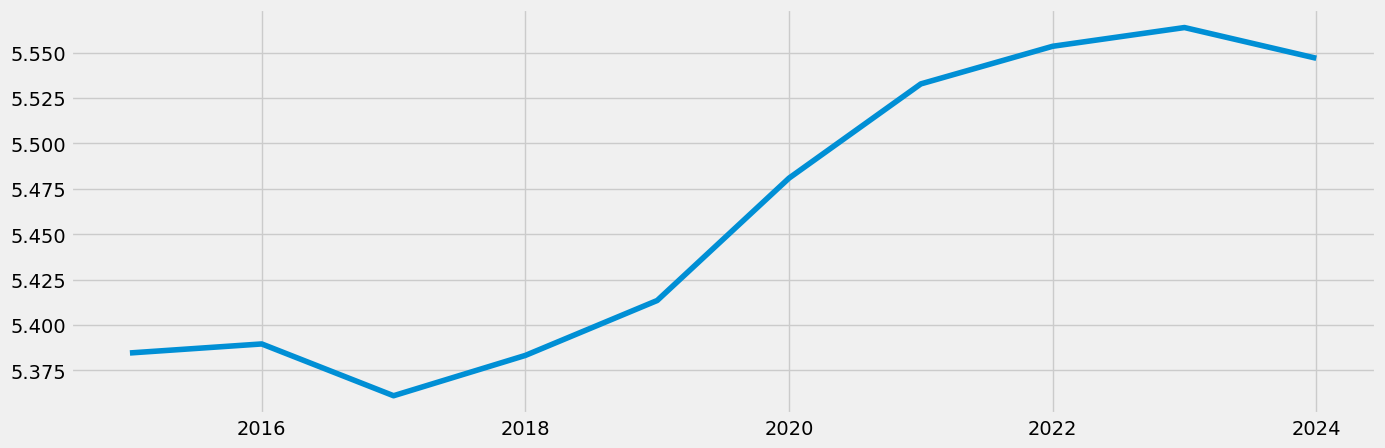

In [31]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_sub)

In [32]:
 #Reset index so that you can use the "Date" column as a filter

df_sub = df_sub.reset_index()
df_sub.head()

,year,happiness_score
0,2015,5.384567
1,2016,5.389532
2,2017,5.360994
3,2018,5.383213
4,2019,5.413477


In [35]:
from datetime import datetime


df_sub['year_1'] = pd.to_datetime(df_sub['year'],format='%Y') # Create a datetime column from "date"
df_sub = df_sub.set_index('year_1') # Set the datetime as the index of the dataframe
df_sub.drop(['year'], axis=1, inplace=True) # Drop the "date" column
df_sub.head()

,happiness_score
year_1,
2015-01-01,5.384567
2016-01-01,5.389532
2017-01-01,5.360994
2018-01-01,5.383213
2019-01-01,5.413477


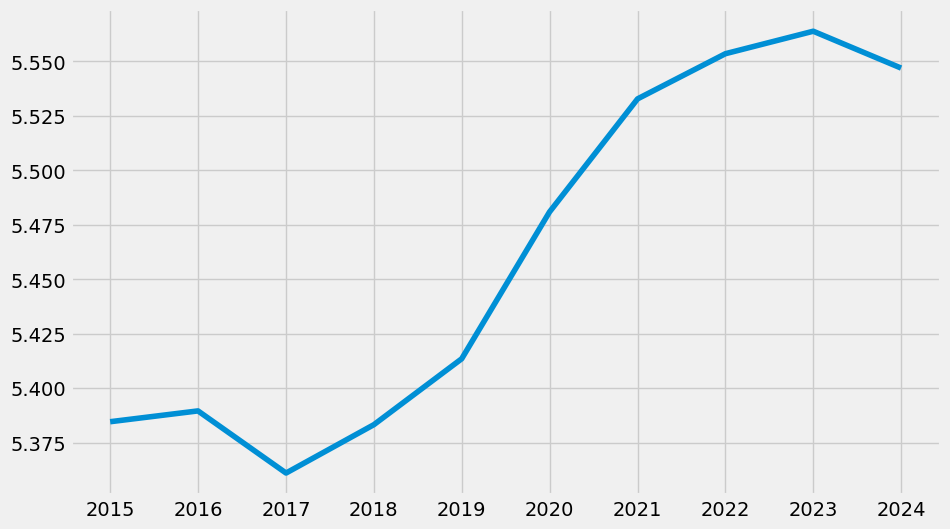

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(df_sub.index, df_sub['happiness_score'])

 

plt.show()


### 3. Time series analysis: decomposition

In [39]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_sub, model='additive')

In [40]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

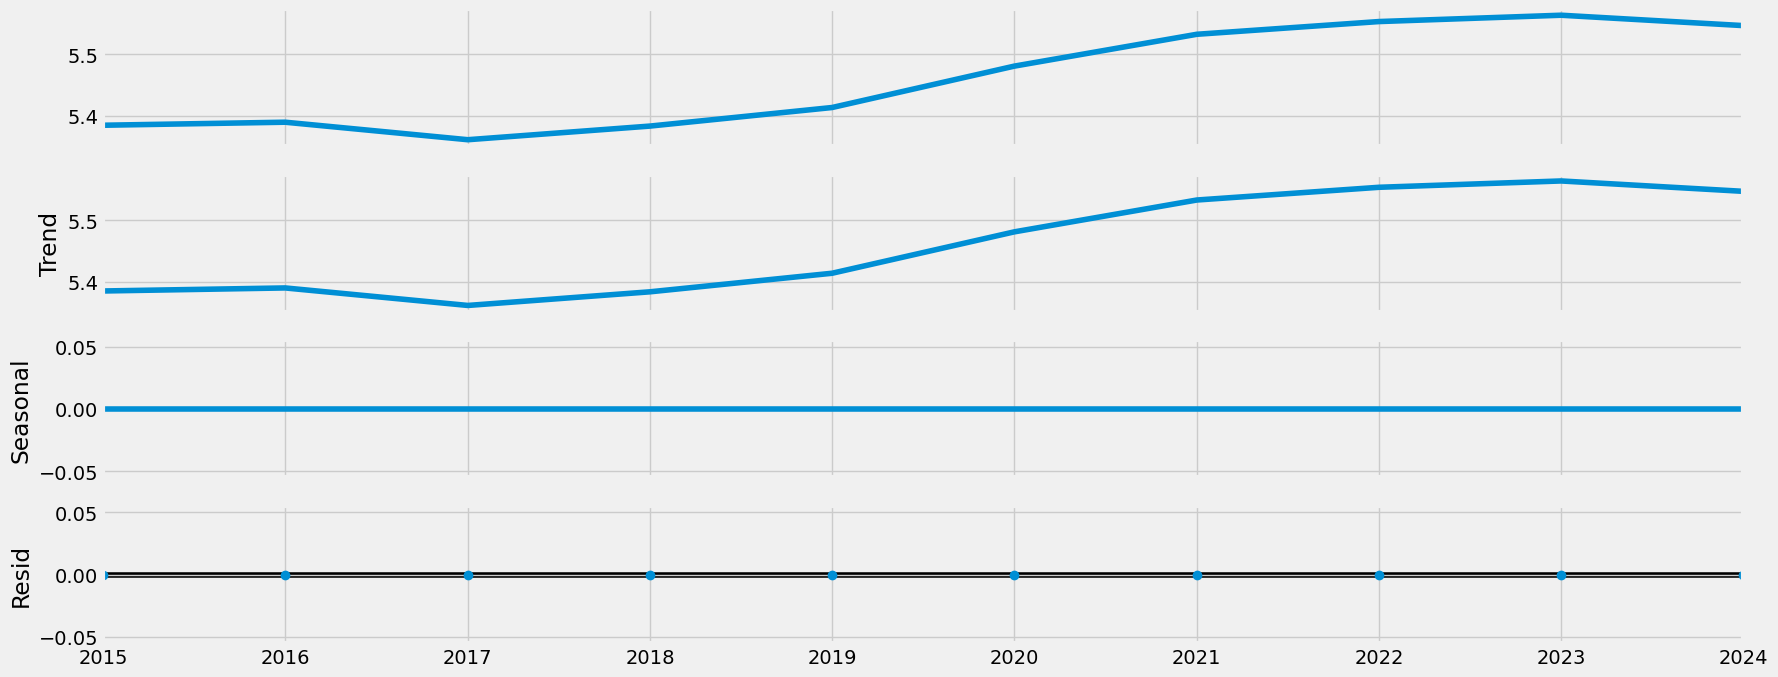

In [41]:
# Plot the separate components

decomposition.plot()
plt.show()

In [42]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_sub['happiness_score'])

Dickey-Fuller Stationarity test:
Test Statistic                -3.466269
p-value                        0.008897
Number of Lags Used            2.000000
Number of Observations Used    7.000000
Critical Value (1%)           -4.938690
Critical Value (5%)           -3.477583
Critical Value (10%)          -2.843868
dtype: float64


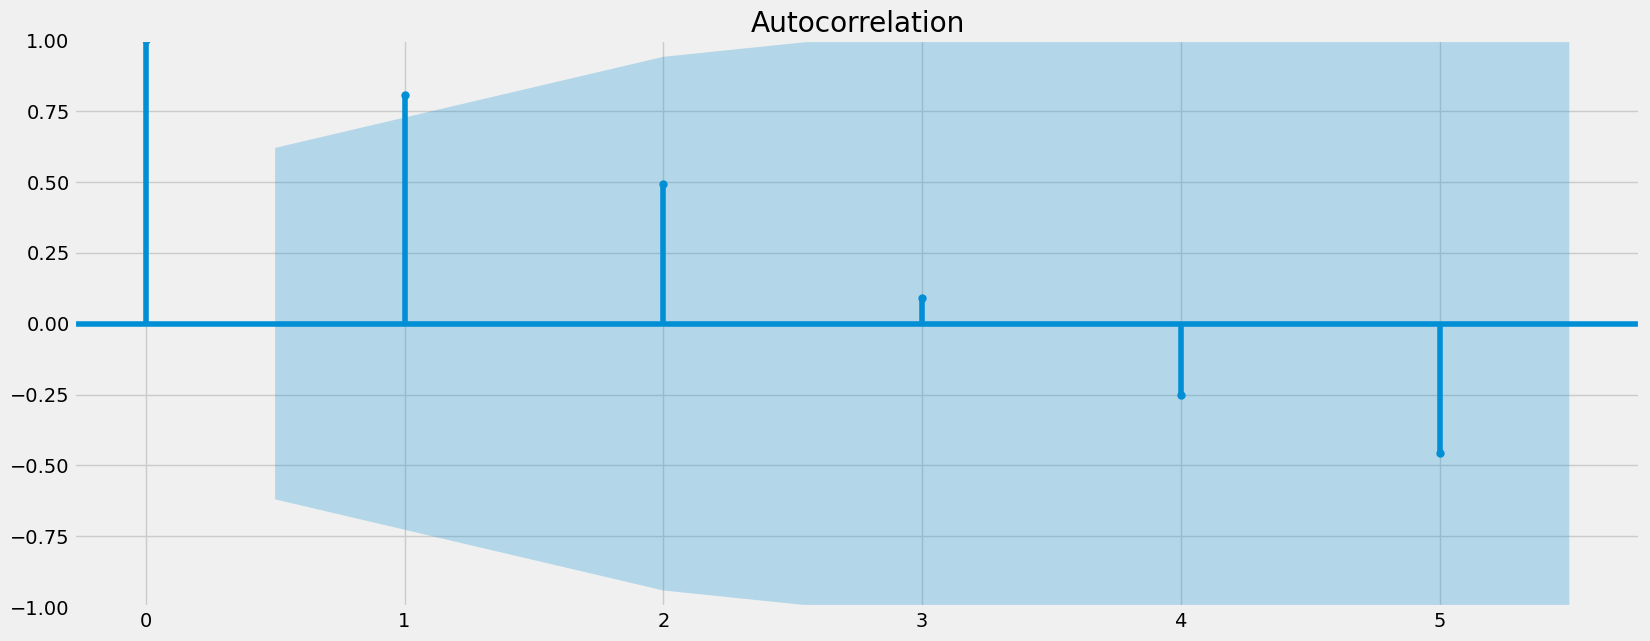

In [43]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_sub)
plt.show()